In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']

In [2]:
GSPC=pd.read_csv('GSPC.csv')
GSPC.index=pd.to_datetime(GSPC.date)
GSPC

,Open,High,Low,Close,Volume,Adjusted,date
date,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09,1831.979980,2014-01-02
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09,1831.369995,2014-01-03
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09,1826.770020,2014-01-06
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09,1837.880005,2014-01-07
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09,1837.489990,2014-01-08
...,...,...,...,...,...,...,...
2014-12-24,2083.250000,2087.560059,2081.860107,2081.879883,1.416980e+09,2081.879883,2014-12-24
2014-12-26,2084.300049,2092.699951,2084.300049,2088.770020,1.735230e+09,2088.770020,2014-12-26
2014-12-29,2087.629883,2093.550049,2085.750000,2090.570068,2.452360e+09,2090.570068,2014-12-29


In [3]:
Close = GSPC.Close
High = GSPC.High
Low = GSPC.Low
ndate=len(Close)

In [4]:
RSV=[]
for j in range(8,ndate):
    periodHigh=np.max(High[(j-8):(j+1)])
    periodLow=np.min(Low[(j-8):(j+1)])
    RSV.append(100*(Close[j]-periodLow)\
           /(periodHigh-periodLow))

In [5]:
RSV=pd.Series(RSV,index=Close.index[8:])
RSV.name='RSV'
RSV.head()
RSV.describe()

count    244.000000
mean      64.847982
std       31.637507
min        0.000000
25%       40.213694
50%       75.757163
75%       92.299787
max      100.000000
Name: RSV, dtype: float64

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

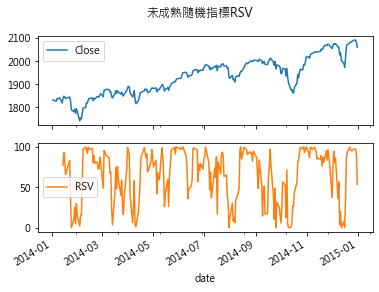

In [6]:
Close1=Close['2014']
RSV1=RSV['2014']
Cl_RSV=pd.DataFrame([Close1,RSV1]).transpose()
from matplotlib.font_manager import FontProperties
Cl_RSV.plot(subplots=True,
             title='未成熟隨機指標RSV')

In [7]:
K=[50]
D=[50]

for i in range(len(RSV)):
    KValue = (2/3)*K[-1] + (RSV[i]/3)
    DValue = (2/3)*D[-1] + KValue/3
    K.append(KValue)
    D.append(DValue)

In [8]:
K=pd.Series(K[1:],index=RSV.index)
K.name='KValue'
K.head()

date
2014-01-14    58.998036
2014-01-15    70.343759
2014-01-16    75.557638
2014-01-17    72.247907
2014-01-21    74.854656
Name: KValue, dtype: float64

In [9]:
D=pd.Series(D[1:],index=RSV.index)
D.name='DValue'
D.head()

date
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
2014-01-21    69.616905
Name: DValue, dtype: float64

In [10]:
J=3*K-2*D
J.name='JValue'
J.head()

date
2014-01-14    70.995416
2014-01-15    93.469645
2014-01-16    97.926733
2014-01-17    82.747662
2014-01-21    85.330158
Name: JValue, dtype: float64

No handles with labels found to put in legend.


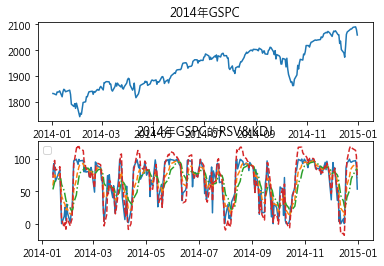

In [11]:
plt.subplot(211)
plt.title('2014年GSPC')
plt.plot(Close['2014'])
plt.subplot(212)
plt.title('2014年GSPC的RSV&KDJ')
plt.plot(RSV['2014'])
plt.plot(K['2014'],linestyle='dashed')
plt.plot(D['2014'],linestyle='-.')
plt.plot(J['2014'],linestyle='--')
plt.legend(loc='upper left') 

In [12]:
KSignal=K.apply(lambda x:\
                    -1 if x>80 else 1 if x<20 else 0)

DSignal=D.apply(lambda x: \
                 -1 if x>80 else 1 if x<20 else 0)
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'

In [13]:
KDSignal[KDSignal>=1]=1
KDSignal[KDSignal<=-1]=-1
KDSignal.head(n=3)

date
2014-01-14    0
2014-01-15    0
2014-01-16    0
Name: KDSignal, dtype: int64

In [14]:
KDSignal[KDSignal==1].head(n=3)


date
2014-02-03    1
2014-02-04    1
2014-02-05    1
Name: KDSignal, dtype: int64

In [15]:
def trade(signal,price):
    ret=(price-price.shift(1))/price.shift(1)
    ret.name='ret'
    signal=signal.shift(1)
    tradeRet=(ret*signal).dropna()
    tradeRet.name='tradeRet'
    tradeRet[tradeRet==-0]=0
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)


In [16]:
KDtrade=trade(KDSignal,Close)
KDtrade.rename(columns={'ret':'Ret',\
              'tradeRet':'KDtradeRet'},\
               inplace=True)
KDtrade.head()

,Ret,KDtradeRet
date,,
2014-01-15,0.005166,0.0
2014-01-16,-0.001347,0.0
2014-01-17,-0.003895,0.0
2014-01-21,0.002774,0.0
2014-01-22,0.000575,0.0


In [17]:
import ffn

In [18]:
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))

In [19]:
backtest(KDtrade.Ret,KDtrade.KDtradeRet)

,Ret,KDtradeRet
win rate,0.576132,0.470588
annualized return,0.120691,0.017515
sharpe ratio,0.068388,0.021664
maximum drawdown,-0.074015,-0.063772


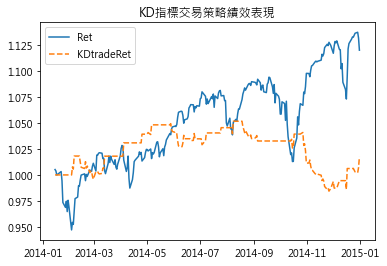

In [20]:
cumRets1=(1+KDtrade).cumprod()
plt.plot(cumRets1.Ret,label='Ret')
plt.plot(cumRets1.KDtradeRet,'--',\
          label='KDtradeRet')
plt.title('KD指標交易策略績效表現')
plt.legend()
from matplotlib.font_manager import FontProperties

In [21]:
JSignal=J.apply(lambda x:\
         -1 if x>100 else 1 if x<0 else 0)
KDJSignal=KSignal+DSignal+JSignal
KDJSignal=KDJSignal.apply(lambda x:\
          1 if x>=2 else -1 if x<=-2 else 0)

In [22]:
KDJtrade=trade(KDJSignal,Close)
KDJtrade.rename(columns={'ret':'Ret',\
             'tradeRet':'KDJtradeRet'},\
             inplace=True)

backtest(KDJtrade.Ret,KDJtrade.KDJtradeRet)

,Ret,KDJtradeRet
win rate,0.576132,0.500000
annualized return,0.120691,0.034513
sharpe ratio,0.068388,0.043026
maximum drawdown,-0.074015,-0.059033


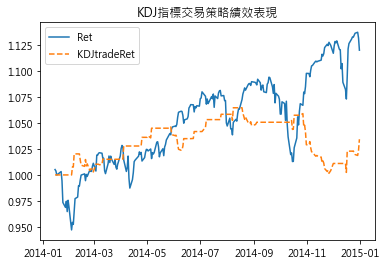

In [23]:
KDJCumRet=(1+KDJtrade).cumprod()
plt.plot(KDJCumRet.Ret,label='Ret')
plt.plot(KDJCumRet.KDJtradeRet,'--',\
          label='KDJtradeRet')
plt.title('KDJ指標交易策略績效表現')
plt.legend(loc='upper left')

In [24]:
backtest(KDJtrade.Ret[:'2014-10-10'],\
             KDJtrade.KDJtradeRet[:'2014-10-10'])

,Ret,KDJtradeRet
win rate,0.566845,0.537037
annualized return,0.048184,0.066724
sharpe ratio,0.031324,0.100208
maximum drawdown,-0.057613,-0.021362


In [25]:
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,\
                   Line.shift(1)<RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
                     index=Line.index[1:]))

In [26]:
KDupbreak=upbreak(K,D)*1
KDupbreak[KDupbreak==1].head()

date
2014-02-06    1
2014-03-04    1
2014-03-20    1
2014-03-31    1
2014-04-16    1
dtype: int32

In [27]:
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,\
                   Line.shift(1)>RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
           index=Line.index[1:]))

In [28]:
KDdownbreak=downbreak(K,D)*1
KDdownbreak[KDdownbreak==1].head()

date
2014-01-23    1
2014-02-21    1
2014-03-11    1
2014-03-24    1
2014-04-07    1
dtype: int32

In [29]:
Close=Close['2014-01-01':]
difClose=Close.diff()

prctrend=2*(difClose[1:]>=0)-1
prctrend.head()

date
2014-01-03   -1
2014-01-06   -1
2014-01-07    1
2014-01-08   -1
2014-01-09    1
Name: Close, dtype: int32

In [30]:
KDupSig=(KDupbreak[1:]+prctrend)==2
KDupSig.head(n=3)

date
2014-01-03    False
2014-01-06    False
2014-01-07    False
dtype: bool

In [31]:
KDdownSig= (KDdownbreak[1:]==1)&(prctrend==-1) 

breakSig=KDupSig*1+KDdownSig*-1
breakSig.name='breakSig'
breakSig.head()

date
2014-01-03    0
2014-01-06    0
2014-01-07    0
2014-01-08    0
2014-01-09    0
Name: breakSig, dtype: int32

In [32]:
KDbreak=trade(breakSig,Close)
KDbreak.rename(columns={'ret':'Ret',\
              'tradeRet':'KDbreakRet'},\
              inplace=True)
KDbreak.head()

,Ret,KDbreakRet
date,,
2014-01-06,-0.002512,0.0
2014-01-07,0.006082,0.0
2014-01-08,-0.000212,0.0
2014-01-09,0.000348,0.0
2014-01-10,0.002307,0.0


In [33]:
backtest(KDbreak.Ret,KDbreak.KDbreakRet)

KDbreakRet=(1+KDbreak).cumprod()

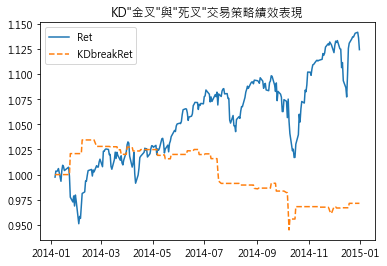

In [34]:
plt.plot(KDbreakRet.Ret,label='Ret')
plt.plot(KDbreakRet.KDbreakRet,'--',\
          label='KDbreakRet')
plt.title('KD"金叉"與"死叉"交易策略績效表現')
plt.legend(loc='upper left')
from matplotlib.font_manager import FontProperties